## 영상 공간 필터링

### 블러 필터

- cv2.boxFilter(src, ksize[, dst[, anchor[, normalize[, borderType ]]]])

##### src는 입력 영상, dst는 src와 같은 크기, 같은 자료형의 ddepth 깊이의 필터링된 출력 영상이다. ddepth = -1이면 src와 같은 깊이이다.
##### 디폴트인 anchor = (-1, -1)은 커널 중심을 의미하고, normalize = True는 튜플 커널 크기 ksize = (kw, kh)로 정규화되며, 평균 필터와 같다.

- cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType ]])

##### bilateralFilter는 가우시안 함수를 사용하여 에지를 덜 약화하면서 양방향 필터링을 한다.
##### src는 8비트 또는 32비트 float 자료형의 1-패널 또는 3-채널 입력 영상이고, dst는 src와 같은 크기, 같은 자료형인 출력 영상이다.
##### d는 필처링 동안 사용될 각 화소의 이웃을 결정할 지름이다. 실시간 처리를 위해서는 d = 5가 적합하다.
##### d <= 0이면 이웃의 크기가 sigmaSpace에 의해 결정된다.
##### sigmaColor는 컬러 공간에서 필터 표준편차이다.
##### sigmaColor가 큰 값을 가지면, 이웃 화소 내의 화소 중에서 색상 공간에서 멀리 떨어진 색상을 혼합하여 유사한 색상으로 뭉개서 큰 영역으로 만든다.
##### sigmaSpace는 좌표공간에서의 필터 표준편차이다.
##### sigmaSpace 값이 크면, sigmaColor에 의해 색상이 충분히 가까우면서 위치가 멀리 떨어진 이웃 화소가 영향을 준다.


- cv2.medianBlur(src, ksize[, dst])

##### medianBlur() 함수는 src에서 정수 커널 크기 Ksize에 의해 Ksize x Ksize의 필터를 사용하여 미디언을 계산하여 dst에 저장한다.
##### src는 1, 3, 4채널 영상이고, ksize = 3 또는 5일 때는 src의 깊이가 8비트, 16비트 부호 없는 정수, 32비트가 실수가 가능하고, Ksize가 크면 8비트만 가능하다.
##### dst는 src와 같은 크기이며 같은 자료형이다.
##### 미디언 필터링의 결과값은 원본 src에 있는 값이며, 소금이나 후추가 뿌려져 있는듯한 잡음의 경우에 평균 필터 또는 가우시안 필터보다 효과적이다.

- cv2.blur(src, ksize[, dst[, anchor[, borderType ]]])

##### blur() 함수는 튜플 커널 크기 ksize = (kw, kh) 내부의 함계를 계산하고, 커널 크기로 정규화된 박스 필터이다.
##### src는 입력 영상으로 모든 채널이 가능하며, 깊이는 8비트 또는 16비트 부호 없는 정구, 16비트 정수, 32비트 실수가 가능하다.
##### dst는 src와 같은 크기이며 같은 자료형이다

- cv2.GaussianBlur(src, ksize, sigmax[, dst[, sigmaY[, borderType ]]])

##### 튜플 커널 크기 ksize = (kw, kh)의 2차원 가우시안 커널과 회선을 수행한다.
##### sigmaX는 X-축 방향으로의 가우시안 커널 표준편차, sigmaY는 Y-축 방향으로의 가우시안 커널 표준편차이다.
##### sigmaX != 0, sigmaY = 0이면, sigmaY = sigmaX이다.
##### sigmaX = 0, sigmaY = 0이면, 튜플 커널 크기 ksize = (kw, kh)로 계산한다.

- cv2.getGaussianKernel(ksize, sigma[, ktype ])

##### ksize x 1의 1차원 가우시안 커널을 배열로 반환한다. ksize는 커널 크기로 3, 5, 7, 9 등의 홀수이다.
##### sigma는 가우시안 표준펴낯이며, sigma <= 0이면 sigma = 0.3 * ((ksize -1) * 0.5 - 1) + 0.8로 계산한다.
##### ktype은 필터의 자료형으로 32비트 또는 64비트 실수이다.

#### 실습

In [1]:
## 미디안 필터, 블러, 가우시안 필터
# 0602.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1= cv2.medianBlur(src, ksize = 7)                      # dst1은 ksize = 7인 미디안 필터
dst2 = cv2.blur(src, ksize=(7, 7))                        # dst2은 ksize = (7, 7)인 블러 필터
dst3 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)    # dst3은 ksize = (7, 7), sigmaX = 0인 가우시안 필터
dst4 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=10.0)   # dst4은 ksize = (7, 7), sigmaX = 10인 가우시안 필터

cv2.imshow('dst1',  dst1)    
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)
cv2.waitKey()    
cv2.destroyAllWindows()


### 미분 필터

- cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scalep, delta[, borderType ]]]]])

##### 입력 src의 Sobel 연산자를 확장한 dx, dy에 따라 1, 2, 3차 미분을 dst에 출력한다.
##### dst는 src와 같은 채널, 같은 크기이다. ddepth는 출력 dst의 화소 구조이며, ddepth = -1이면, src와 같은 화소 구조이다.
##### src가 cv2.CV_8U이면 dst의 ddepth는 -1, cv2.CV_165, cv2.CV_32F, cv2.CV_64F가 가능하다.
##### dx는 x축 미분 차수, dy는 y축 미분 차수이다.
##### ksize는 Sobel 윈도우 필터의 크기로 1, 3, 5, 7이다. 예를 들어, ksize = 3이면 3x3 윈도우 필터이고, dx = 1, dy = 0이면, x-축 편미분 gx, dx = 0, dy = 1이면 y-축 편미분 gy필터를 적용한다. ksize = 1이면 dx, dy에 따라 3x1 또는 1x3 커널이 적용되고, x-축, y-축으로의 1차 또는 2차 미분만을 위해 사용한다.
##### 8비트 입력 영상 src에 대하여 Sobel() 함수로 미분을 계산할 때, 출력 영상 dst가 8비트이면 계산 결과의 절단에 주의한다.

- cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType ]]]]])

##### src에 대하여 2차 미분을 이용한 Laplacian을 적용한 후에 scale로 스케일링하고 delta 값을 더해 ddepth 깊이의 dst에 저장한다.
##### ksize는 필터 크기를 결정한다. 에지는 라플라시안 필터링 결과에서 0-교차하는 위치를 찾는다.
##### 라플라시안 필터링은 2차 미분을 사용하므로 잡음에 민감하다.
##### 잡음을 줄이는 방법은 입력 영상에 가우시안 필터를 사용하여 영상을 부드럽게 하여 잡음을 제거하고 미분 오차를 줄이며 라플라시안 필터링을 사용하는 것이다.

- cv2.getDerivKernels(dx, dy, ksize[, kx[, ky[, normalize[, ktype ]]]])

##### cv2.getDerivKernels() 함수는 영상에서 미분을 계산하기 위한 1D 선형 필터를 반환한다.
##### kx, ky는 행과 열의 dx, dy 미분 필커 계수를 위한 출력행렬이다.
##### nomalize = True이면 정규화한다.
##### ktype은 kx, ky의 자료형으로 32비트 실수 또는 64비트 실수이다.
##### ksize는 커널의 크기이다. ksize = 1, 3, 5, 7이면 Sobel 커널이 생성된다. 생성된 커널을 사용하여 cv2.sepFilter2D() 함수로 필터링하여 미분을 계산한다.
##### 2D 필터는 ky.dot(kx.T)행렬 곱셈으로 얻을 수 있다.

#### 실습

In [2]:
## Sobel 필터 1
# 0603.py
import cv2
import numpy as np

src = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
#1
# 입력 영상 src의 그래디언트 gx, gy를 cv2.Sobel()함수를 계산한다.
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3) # 윈도우 필터의 크기는 3, x-축 편미분 gx
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3) # y-축 편미분 gy

#2
dstX = cv2.sqrt(np.abs(gx)) # gx의 절대값의 제곱근 계산
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U) # 최소값 0, 최대값 255로 정규화

#3
dstY = cv2.sqrt(np.abs(gy)) # gy의 절대값의 제곱근 계산
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U) # 최소값 0, 최대값 255로 정규화

#4
mag   = cv2.magnitude(gx, gy)                         # cv2.magnitude(gx, gy)로 그래디언트 크기를 mag에 계산한다. mag의 값이 큰 화소가 에지이다.
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)   
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U) # cv2.normalize()로 최소값을 0, 최대값을 255로 dstM에 정규화한다.
# ret, dstM = cv2.threshold(mag, 200, 255,  cv2.NORM_MINMAX,
#                           cv2.THRESH_BINARY+cv2.THRESH_OTSU)    # cv2.threshold()를 사용하면 에지와 배경을 갖는 이진 영상을 얻을 수 있다.

cv2.imshow('src',  src)
cv2.imshow('dstX',  dstX)    
cv2.imshow('dstY',  dstY)
cv2.imshow('dstM',  dstM)
cv2.waitKey()
cv2.destroyAllWindows()


mag: 0.0 1053.8966064453125 (0, 0) (356, 328)


angle: 0.0 359.88543701171875 (0, 0) (357, 120)


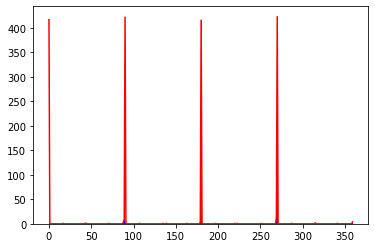

In [3]:
## Sobel 필터 2: 에지 그래디언트 방향
# 0604.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('./data/rect1.jpg', cv2.IMREAD_GRAYSCALE)
##src = cv2.imread('./data/line.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)                     # cv2.Sobel()함수를 이용하여 src의 그래디언트 gx, gy를 계산한다.
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)            # cv2.cartToPolar()로 그래디언트 mag와 각도 angle을 계산한다.
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle)
print('angle:', minVal, maxVal, minLoc, maxLoc)

#2
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)          # cv2.threshold()로 mag에서 임계값 100을 사용하여 이진 영상 edge를 계산한다.
edge = edge.astype(np.uint8)                                         # 화면 표시를 위해 화소 자료형 uint.8로 변경한다.
cv2.imshow('edge',  edge)                                            # 이진영상 edge를 윈도우 화면에 출력

#3
height, width = mag.shape[:2]
angleM = np.full((height,width, 3), (255, 255, 255), dtype= np.uint8)# angleM을 배경이 흰색(255, 255, 255)인 3-채널 컬러 영상으로 생성
for y in range(height):
    for x in range(width):
        if edge[y, x] != 0: # if mag[y, x] > 100: # edge             # edge[y, x] != 0에 의해 에지인 화소에서 그래디언트 각도가 0, 90, 180, 270도인 화소에서
            if angle[y, x] ==   0:                                   # 빨강, 초록, 파랑, 노랑, 그 외 각도의 에지 화소는 회색을 angleM[y, x]에 저장한다.
                angleM[y, x] =  (0, 0, 255)   # red
            elif angle[y, x] == 90:
                 angleM[y, x] = (0, 255, 0)   # green
            elif angle[y, x] ==180:
                 angleM[y, x] = (255, 0, 0)   # blue                 
            elif angle[y, x] ==270:
                 angleM[y, x] = (0, 255, 255) # yellow
            else:
                angleM[y, x] =  (128, 128, 128) # gray                
cv2.imshow('angleM',  angleM)                                        # 그래디언트 각도를 컬러로 표시한 컬러영상 angleM이다.
cv2.waitKey()    
cv2.destroyAllWindows()

#4
hist = cv2.calcHist(images=[angle], channels=[0], mask=edge,         # cv2.calcHist()로 그래디언트 각도 angle의 히스토그램을 
                    histSize=[360], ranges=[0, 360])                 # histSize = [360], ranges = [0, 360], mask = edge로 hist에 계산한다.
                                                                     # 변화가 없는 gx = 0, gy = 0인 화소와 구분하기 위하여, 에지영상 edge를 마스크로 사용하여
                                                                     # 에지에서만 히스토그램을 구하는 것이 중요하다.
        
hist = hist.flatten()                                                # 막대그래프로 그리기위하여 hist의 모양을 (360, )의 1차원 행 배열로 변경한다.
##plt.title('hist: binX = np.arange(360)')
plt.plot(hist, color='r')
binX = np.arange(360)
plt.bar(binX, hist, width=1, color='b')
plt.show()


In [11]:
## Laplacian 필터 1
# 0605.py
import cv2
import numpy as np

#1
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)  
blur= cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)     # src를 부드럽게 하여 미분 오차를 줄이기 위하여 ksize = (7, 7)크기의 필터를 가우시안 블러링으로 blur 생성
cv2.imshow('src',  src)
cv2.imshow('blur', blur)

#2
lap  = cv2.Laplacian(src, cv2.CV_32F)                     # src에 라플라시안 필터링을 하여 lap 생성 
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)       
print('lap:', minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap)                            # lap의 절대값을 dst에 저장
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)   # 범위 [0, 255]로 dst를 정규화한다.
cv2.imshow('lap',  lap)
cv2.imshow('dst',  dst)

#3
lap2 = cv2.Laplacian(blur, cv2.CV_32F)                    # blur에 라플라시안 필터링을 하여 lap2 생성
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print('lap2:', minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2)                          # lap의 절대값을 dst2에 저장
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX) # 범위 [0, 255]로 dst2를 정규화한다.

cv2.imshow('lap2',  lap2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()


lap: -239.0 189.0 (404, 181) (221, 287)
lap2: -35.0 30.0 (180, 435) (367, 449)


In [14]:
## Laplacian 필터 2 : 0-교차
# 0606.py
import cv2
import numpy as np

#1
#src  = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
src  = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
#src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)               # src를 부드럽게 하여 미분오차를 줄이기 위하여 ksize = (7, 7)의 가우시안 블러 영상 blur 생성
lap = cv2.Laplacian(blur, cv2.CV_32F,3)                              # blur에 라플라시안 필터를 적용해서 lap 생성

ret, edge = cv2.threshold(np.abs(lap), 10, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
cv2.imshow('edge',  edge)

#2
def SGN(x):           # SGN(LAP[Y, X])와 8-이웃 화소 neighbors 중 최소값의 부호 SGN(mValue)가 같지 않으면 영-교차점으로 판단한다.
    if x >= 0:
        sign = 1
    else:
        sign = -1
    return sign

def zeroCrossing(lap):
    height, width = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8)    
    for y in range(1, height-1):
        for x in range(1,width-1):
            neighbors=[lap[y-1,x], lap[y+1,x], lap[y,x-1], lap[y,x+1],
                       lap[y-1,x-1], lap[y-1,x+1], lap[y+1,x-1], lap[y+1,x+1]]                       
            mValue= min(neighbors)
            if SGN(lap[y,x]) != SGN(mValue):
                Z[y, x] = 255
    return Z
edgeZ = zeroCrossing(lap)
cv2.imshow('Zero Crossing',  edgeZ) # ksize = (7, 7)의 0-교차점에 의한 에지 영상이다.
cv2.waitKey()    
cv2.destroyAllWindows()


### 일반적인 필터 연산

- cv2.filter2D(src, ddepth, kernel[, dstp, anchor[, delta[, borderType ]]]])

##### filter2D() 함수는 src에 윈도우 kernel을 이용하여 회선을 계산하여 dst에 저장한다.
##### ddepth는 dst의 화소 깊이로 ddepth = -1이면 입력과 같은 화소 깊이이다.
##### kernel은 1-채널 실수 배열로 src의 모든 채널에 동일하게 적용된다.
##### anchor는 커널의 중심점으로 kernel 내의 위치이다.
##### delta는 필터링 결과에 더해지는 값이다.

- cv2.sepFilter2D(src, ddepth, kernelX, kernelY[, dst[, anchor[, delta[, borderType ]]]])

##### sepFilter2D() 함수는 분리 가능한 선형 필터 kernelX, kernelY를 적용한다.
##### 입력 src의 각 행에 커널 kernelX 적용한 결과의 각 열에 커널 kernelY를 적용하여 필터링한다.
##### 선형 필터 방식은 연산 속도가 빠르다.

#### 실습

In [13]:
## cv2.filter2D()와 cv2.sepFilter2D()에 의한 에지 검출
# 0607.py
import cv2
import numpy as np

src  = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
# src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

#1
kx, ky = cv2.getDerivKernels(1, 0, ksize=3)                  # dx = 1, dy = 0, ksize = 3으로 x-축 미분 방향 선형 필터 kx, ky를 생성한다.
sobelX = ky.dot(kx.T)                                        # sobelX 필터는 dx = 1, dy = 0의 Sobel에서 필터이다.
# sobelX = np.array([[-1,  0,  1],
#                   [-2,  0,  2],
#                   [-1,  0,  1]], dtype=np.float32)

print('kx=', kx)
print('ky=', ky)
print('sobelX=', sobelX)
gx = cv2.filter2D(src, cv2.CV_32F, sobelX)                   # cv2.filter2D()로 src에 sobelX필터를 적용하여 gx를 생성한다.
# gx = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#2
kx, ky = cv2.getDerivKernels(0, 1, ksize=3)                  # dx = 0, dy = 1, ksize = 3으로 y-축 미분 방향 선형 필터 kx, ky를 생성한다.
sobelY = ky.dot(kx.T)                                        # sobelY 필터는 dx = 0, dy = 1의 Sobel에서 필터이다.
# sobelY = np.array([[-1, -2, -1],
#                   [ 0,  0,  0],
#                   [ 1,  2,  1]], dtype=np.float32)

print('kx=', kx)
print('ky=', ky)
print('sobelY=', sobelY)
gy = cv2.filter2D(src, cv2.CV_32F, sobelY)                   # cv2.filter2D()로 src에 sobelY필터를 적용하여 gy를 생성한다.
# gy = cv2.sepFilter2D(src, cv2.CV_32F, kx, ky)

#3
mag   = cv2.magnitude(gx, gy)                                # cv2.magnitude()로 그래디언트(gx, gy)의 크기를 mag에 계산
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)  # 임계값 100을 사용하여 에지 이진 영상 edge를 생성한다.

cv2.imshow('edge',  edge)
cv2.waitKey()    
cv2.destroyAllWindows()


kx= [[-1.]
 [ 0.]
 [ 1.]]
ky= [[1.]
 [2.]
 [1.]]
sobelX= [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
kx= [[1.]
 [2.]
 [1.]]
ky= [[-1.]
 [ 0.]
 [ 1.]]
sobelY= [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [5]:
## loG 필터링, 0-교차 에지 영상
# 0608.py
import cv2
import numpy as np

src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

#1
def logFilter(ksize=7):                                             
    k2 = ksize//2
    sigma = 0.3*(k2-1) + 0.8
    print('sigma=', sigma)
    LoG = np.zeros((ksize, ksize), dtype=np.float32)
    for y in range(-k2, k2+1):
        for x in range(-k2, k2+1):
            g = -(x*x+y*y)/(2.0*sigma**2.0)
            LoG[y+k2, x+k2] = -(1.0+g)*np.exp(g)/(np.pi*sigma**4.0)
    return LoG

# logFilter()함수는 ksize의 loG필터를 생성하여 반환한다. 라플라시안 필터링은 2차 미분을 사용하여 잡음에 민감하다. 잡음을 줄이는 방법으로 입력 영상을
# 가우시안 필터링하여 잡음을 제거한 후에 라플라시안을 적용하는 방법을 사용할 수 있다. 또는 가우시안 함수에 대한 2차 미분에 의한 라플라시안을 계산하여
# 윈도우 필터를 생성하여 필터링할 수도 있다. 이러한 필터링을 loG라 한다. 에지는 loG 필터링된 결과에서 0-교차하는 위치이다.

#2
kernel = logFilter() #7, 15, 31, 51
LoG = cv2.filter2D(src, cv2.CV_32F, kernel)
cv2.imshow('LoG',  LoG)

# logFilter()로 ksize의 가우시안의 라플라시안 필터 kernel을 생성한다. cv2.filter2D()로 src에 kernel 필터를 적용하여 loG를 생성한다.

#3
def zeroCrossing2(lap, thresh=0.01):
    height, width = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8) 
    for y in range(1, height-1):
        for x in range(1,width-1):
            neighbors=[lap[y-1,x],   lap[y+1,x],   lap[y,x-1],   lap[y,x+1],
                       lap[y-1,x-1], lap[y-1,x+1], lap[y+1,x-1], lap[y+1,x+1]]
            pos = 0
            neg = 0
            for value in neighbors:
                if value > thresh:
                    pos += 1
                if value < -thresh:  # value < thresh
                    neg += 1
            if pos > 0 and neg > 0:
                Z[y, x] = 255                        
    return Z

# zeroCrossing2() 함수로 lap[y, x]의 8-이웃 화소 neighbors에서 임계값 thresh를 이용하여 value > thresh인 개수 pos, value < -thresh는 neg에 카운트하여
# pos > 0 and neg > 0이면 영-교차점으로 판단한다. 0 대신 thresh를 사용하는 것은 계산에서 실수에 따른 오차 때문이다.

edgeZ = zeroCrossing2(LoG)
cv2.imshow('Zero Crossing2',  edgeZ)
cv2.waitKey()    
cv2.destroyAllWindows()


sigma= 1.4


### 모폴로지 연산

- cv2.getStructuringElement(shape, ksize[, anchor ])

##### cv2.getstructuringElement() 함수는 모폴로지 연산에 사용하는 사각형 cv2.MORPH_RECT, 타원 cv2.MORPH_ELLIPSE, 십자 cv2.MORPH_CROSS 등의 shape 모양의 ksize 크기 구조 요소를 반환한다.
##### anchor = (-1, -1)이면 중심점이 앵커점이 된다.

- cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue ]]]]])

##### src에 kernel를 적용하여 모폴로지 침식 연산을 iterarions만큼 반복하여 dst에 저장한다.
##### kernel = None이면 3 x 3 사각형 커널을 사용한다.
##### 디폴트 anchor는 kernel의 중심점이 앵커점이 된다.
##### src는 cv2.CV_8U, cv2.CV_16U, cv2.CV_16S, cv2.CV_32F, cv2.CV_64F의 화소 깊이를 가지며, 채널 수는 제한이 없다.
##### 그레이스케일 영상에서는 반복적인 min 필터링과 같다. cv2.erode()로 지역 극소값을 계산할 수 있다.

- cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue ]]]]])

##### src에 kernel을 적용하여 모폴로지 팽창 연산을 iterations만큼 반복하여 dst에 저장한다.
##### kernel = None이면 3 x 3 사각형 커널을 사용한다.
##### 그레이스케일 영상에서는 반복적인 max 필터링과 같다.
##### cv2.dilate()로 지역 극대값을 계산할 수 있다.

- cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue ]]]]])

##### src에 kernel를 적용하여 모폴로지 op 연산을 iterations만큼 반복하여 dst에 저장한다.
##### 아래는 모폴로지 op 연산을 표시한다.
1. cv2.MORPH_OPEN
2. cv2.MORPH_CLOSE
3. cv2.MORPH_GRADIENT
4. cv2.MORPH_TOPHAT
5. cv2.MORPH_BLACKHAT

#### 실습

In [17]:
## erode()와 dilate() 모폴로지 연산 1
# 0609.py
import cv2
import numpy as np

src   = cv2.imread('./data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3)) # 구조화 요소 커널, shape = cv2.MORPH_RECT, ksize = (3, 3)으로 사각형 kernel을 생성
erode = cv2.erode(src,kernel,iterations = 5)                         # 모폴로지 연산 수행, 침식연산적용횟수 iterations = 5
dilate = cv2.dilate(src,kernel,iterations = 5)                       # 모폴로지 연산 수행, 팽창연산적용횟수 iterations = 5
erode2= cv2.erode(dilate,kernel,iterations = 7)                      # 모폴로지 연산 수행, 침식연산적용횟수 iterations = 7
dilate2= cv2.dilate(erode2,kernel,iterations = 2)                    # 모폴로지 연산 수행, 팽창연산적용횟수 iterations = 2

cv2.imshow('src',    src)
cv2.imshow('erode',  erode)
cv2.imshow('dilate', dilate)
cv2.imshow('erode2', erode2)
cv2.imshow('dilate2',    dilate2)
cv2.waitKey()
cv2.destroyAllWindows()


In [55]:
## morphologyEx() 모폴로지 연산
# 0610.py
import cv2
import numpy as np

src   = cv2.imread('./data/morphology.jpg', cv2.IMREAD_GRAYSCALE)
kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))        # 구조화 요소 커널, shape = cv2.MORPH_RECT, ksize = (3, 3)으로 사각형 kernel을 생성
closing = cv2.morphologyEx(src,cv2.MORPH_CLOSE,kernel,iterations = 5)       # 흰색 문체 속의 검은색 잡음 제거
opening = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel,iterations = 5)    # 흰색 잡음 제거
gradient = cv2.morphologyEx(opening,cv2.MORPH_GRADIENT,kernel)              # 테두리 검출
# gradient=cv2.morphologyEx(opening,cv2.MORPH_GRADIENT,kernel, iterations=5)# 5회 수행, 두꺼운 테두리

tophat = cv2.morphologyEx(src,cv2.MORPH_TOPHAT,kernel,iterations = 5)       # 검은색 배경 속의 흰색 점 검출
balckhat = cv2.morphologyEx(src,cv2.MORPH_BLACKHAT,kernel,iterations = 5)   # 흰색 물체 속의 검은색 점 검출

cv2.imshow('src', src)
cv2.imshow('opening',  opening)
cv2.imshow('closing',  closing)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat',   tophat)
cv2.imshow('balckhat', balckhat)
cv2.waitKey()
cv2.destroyAllWindows()


In [22]:
## 모폴로지 연산 골격화
# 0611.py
"""
ref: https://gist.github.com/jsheedy/3913ab49d344fac4d02bcc887ba4277d
ref: http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/
"""
import cv2
import numpy as np
# 입력 A의 골격화를 구조요소 B를 사용한 침식(erosion)과 열기(opening)에 의한 골격화를 구현한다. 
# A-kB는 k-번 연속 침식 연산이다. 침식 연산이 공집합일때까지 Sk(A)를 계산하여 합집합을 계산한다.

#1
src = cv2.imread('./data/T.jpg', cv2.IMREAD_GRAYSCALE)         
src   = cv2.imread('./data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
src = cv2.bitwise_not(src)
print(src.shape)

ret, A = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY)        # src에 임계값을 적용하여 이진영상 A를 생성하고, 결과를 위한 skel-dst를 생성한다.
print(src.shape)
skel_dst = np.zeros(src.shape, np.uint8)

#2
# shape1=cv2.MORPH_CROSS # 십자가형
shape2=cv2.MORPH_RECT  # 직사각형
B= cv2.getStructuringElement(shape=shape2, ksize=(3,3)) # 구조 요소 생성
done = True
while done:   
    erode  = cv2.erode(A, B) # A를 B로 erode 침식
    opening = cv2.dilate(erode,B) # erode를 B로 opening 열기
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, B) 
    tmp    = cv2.subtract(erode, opening) # cv2.absdiff(erode, opening) # tmp = erode - opening
    skel_dst = cv2.bitwise_or(skel_dst, tmp) # skel_dst의 합집합을 계산
    A = erode.copy() # erode를 A에 복사
    done = cv2.countNonZero(A) != 0 # A가 공집합이 아니면 계속 반복한다.
    
    # cv2.imshow('opening',  opening)
    # cv2.imshow('tmp',  tmp)    
    # cv2.imshow('skel_dst',  skel_dst)
    # cv2.waitKey()
    

cv2.imshow('src',  src)
cv2.imshow('skel_dst',  skel_dst)
cv2.waitKey()
cv2.destroyAllWindows()


(512, 512)
(512, 512)


### 템플릿 매칭

1. 템플릿 매칭을 참조 영상에서 템플릿 영상과의 매칭 위치를 탐색하는 방법이다.
2. 템플릿 매칭을 물체 인식, 스테레오 영상에서 대응점 검출 등에 사용될 수 있다.
3. 템플릿 매칭을 이동문제는 해결할 수 있지만, 회전 및 스케일링 된 물체에 대한 매칭은 템플릿을 회전 밒 스케일링시켜가며 여러 개의 템플릿을 이용할 수 있으나 어려운 문제이다.
4. 템플릿 매칭에서는 영상의 밝기를 그대로 사용할 수 있고, 에지, 코너점, 주파수 변환 등의 특징 공간으로 변환하여 템플릿 매칭을 수행할 수 있으며, 영상의 밝기 등에 덜 민감하도록 정규화 과정이 필요하다.

- cv2.matchTemplate(image, templ, method[, result ])

##### 참조 영상 image에서 templ을 method의 방법에 따라 템플릿 매칭을 계산하여 result에 반환한다.
##### image는 8비트 또는 32비트 실수이며, templ은 image에서 찾으려는 작은 영역의 템플릿으로, 자료형은 image와 같고, 크기는 image와 같거나 작아야 한다.
##### result는 결과를 저장할 32비트 실수 행렬로, image의 크기가 W x H이고 templ의 크기가 w x h이면 result의 크기는 (W - w + 1) x (H - h + 1)이다. method는 비교하는 방법을 지정한다.
##### 템플릿의 매칭 위치를 찾기 위해서는 minMaxLoc() 함수로 템플릿 매칭 결과인 result에서 method에 따라서 최소값(cv2.CV_TM_SQDIFF)의 위치 또는 최대값(cv2.CV_TM_CCORR, cv2.CV_TM_CCOEFF)의 위치를 찾아 템플릿의 매칭 위치를 찾는다.
##### 주의할 것은 minMaxLoc() 함수는 같은 값의 최대값과 최소값이 있는 경우 처음 위치만 찾는다.

#### 실습

In [28]:
# 0612.py
import cv2
import numpy as np

src   = cv2.imread('./data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
tmp_A   = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
tmp_S   = cv2.imread('./data/S.bmp', cv2.IMREAD_GRAYSCALE)
tmp_b   = cv2.imread('./data/b.bmp', cv2.IMREAD_GRAYSCALE)
dst  = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)  # 출력 표시 영상

#1
R1 = cv2.matchTemplate(src, tmp_A, cv2.TM_SQDIFF_NORMED)
print(R1)
minVal, _, minLoc, _ = cv2.minMaxLoc(R1)
print('TM_SQDIFF_NORMED:', minVal, minLoc)
h, w = tmp_A.shape[:2]
cv2.rectangle(dst, minLoc, (minLoc[0]+w, minLoc[1]+h), (255, 0, 0), 2)
# 참조 영상 src에서 템플릿 tmp_A를 cv2.TM_SQDIFF_NORMED 방법으로 매칭한 결과를 R1에 저장한다.
# cv2.minMaxLoc(R1)로 최소값 minVal와 최소값 위치 minLoc를 찾는다.
# cv2.rectangle()로 최소값 위치 minLoc와 tmp_A의 크기(h, w)를 이용한 모서리 좌표 (minLoc[0] + w, minLoc[1], h)로 dst에 사각형을 표시한다.

#2
R2 = cv2.matchTemplate(src, tmp_S, cv2.TM_CCORR_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R2)
print('TM_CCORR_NORMED:', maxVal, maxLoc)
h, w = tmp_S.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+w, maxLoc[1]+h), (0, 255, 0), 2)
# 참조 영상 src에서 템플릿 tmp_s를 cv2.TM_CCORR_NORMED 방법으로 매칭한 결과를 R2에 저장한다.
# cv2.minMaxLoc(R2)로 최대값 maxVal와 최대값 위치 maxLoc를 찾는다.
# cv2.rectangle()로 최대값 위치 maxLoc와 tmp_S의 크기(h, w)를 이용한 모서리 좌표(maxLoc[0] + w.maxLoc[1] + h)로 dst에 사각형을 표시한다.

#3
R3 = cv2.matchTemplate(src, tmp_b, cv2.TM_CCOEFF_NORMED)
_, maxVal, _, maxLoc = cv2.minMaxLoc(R3)
print('TM_CCOEFF_NORMED:', maxVal, maxLoc)
h, w = tmp_b.shape[:2]
cv2.rectangle(dst, maxLoc, (maxLoc[0]+w, maxLoc[1]+h), (0, 0, 255), 2)
# 참조 영상 src에서 템플릿 tmp_b를 cv2.TM_CCOEFF_NORMED 방법으로 매칭한 결과를 R3에 저장한다.
# cv2.minMaxLoc(R3)로 최대값 maxVal 와 최대값 위치 maxLoc를 찾는다.
# cv2.rectangle()로 최대값 위치 maxLoc와 tmp_b의 크기(h, w)를 이용한 모서리 좌표(maxLoc[0] + w.maxLoc[1] + h)로 dst에 사각형을 표시한다.

cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


[[0.43006483 0.43609342 0.44534802 ... 0.39194614 0.39194614 0.39194578]
 [0.43382016 0.44009125 0.44975823 ... 0.39194614 0.39194614 0.39194578]
 [0.4371895  0.44372645 0.45372277 ... 0.39194614 0.39194614 0.39194578]
 ...
 [0.39194596 0.39194596 0.39194596 ... 0.39194614 0.39194614 0.39194614]
 [0.39194614 0.39194614 0.39194614 ... 0.39194614 0.39194614 0.39194614]
 [0.39194614 0.39194614 0.39194614 ... 0.39194614 0.39194614 0.39194596]]
TM_SQDIFF_NORMED: 3.929205263375479e-07 (18, 20)
TM_CCORR_NORMED: 1.0 (280, 146)
TM_CCOEFF_NORMED: 1.0 (92, 280)
